# Semantic Search on Bacteria Habitats via Entity Normalization

## Introduction

**Problem Definition:** Mapping queries and PubMed abstracts to habitat ontology for document retrieval.

**Approach:** Learning projection between documents and ontology spaces:
    - Pretrained word embeddings for document representation.
    - Graph embeddings on enriched ontology for ontology space.
    - Learning projection between two spaces.
    - Evaluation with shortest path distance.

## Graph Analytics

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [7]:
graph_path = './data/ontobiotope_nx_2019.gph'
enriched_graph_path = './data/ontobiotope_enriched_2019.gph'

In [8]:
graph = nx.readwrite.read_gexf(graph_path)
enriched_graph = nx.readwrite.read_gexf(enriched_graph_path)

In [10]:
depths_graph = nx.shortest_path_length(graph, source='OBT:000000')
depth_of_tree_graph = max(depths_graph.values())
diameter_graph = nx.algorithms.distance_measures.diameter(graph)
graph_clique_number = nx.graph_clique_number(graph)

depths_enriched_graph = nx.shortest_path_length(enriched_graph, source='OBT:000000')
depth_of_tree_enriched_graph = max(depths_enriched_graph.values())
diameter_enriched_graph = nx.algorithms.distance_measures.diameter(enriched_graph)
enriched_clique_number = nx.graph_clique_number(enriched_graph)

### Graph Statistics

|                | # Nodes | # Edges | Diameter | Max Dist to Root | Max Clique Size |
|:--------------:|:-------:|:-------:|:--------:|:----------------:|:---------------:|
| Taxonomy |   3602  |   3984  |    23    |        14        |        3        |
| Enriched Graph |   3602  |   6115  |    18    |        11        |        16       |

C:\Users\rizao\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\rizao\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


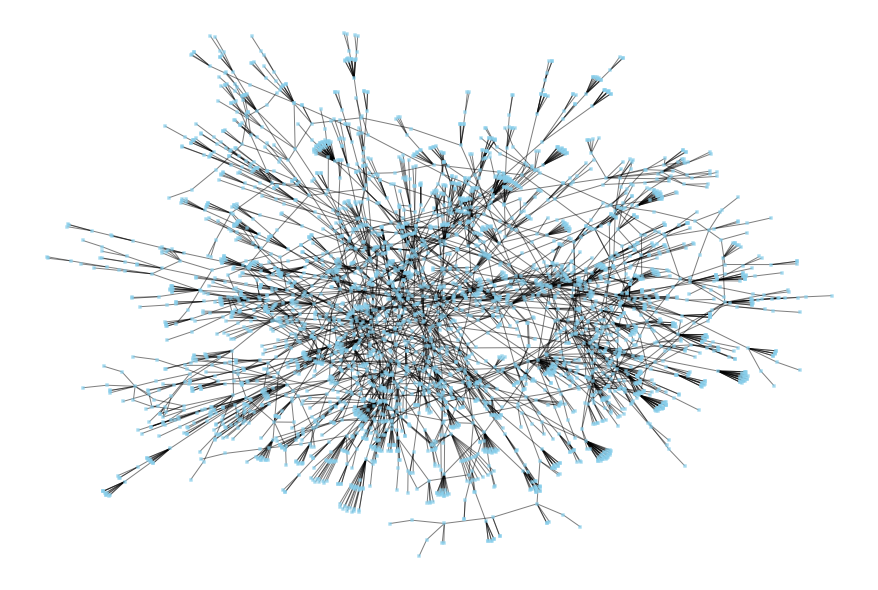

<Figure size 1152x576 with 0 Axes>

In [46]:
plt.figure(figsize=(12,8))
nx.spring_layout(graph)
nx.draw(graph, with_labels=False, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=2)
plt.figure(figsize=(16,8))
plt.draw()
plt.savefig('./figures/initial_graph_whole', facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1) 


### Clique Analysis

In [37]:
max_clique = [c for c in cliques_enriched_graph if len(c) == 16][0]
id_to_name = {node_id: enriched_graph.nodes(data=True)[node_id]['name'] for node_id in max_clique}

C:\Users\rizao\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\rizao\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


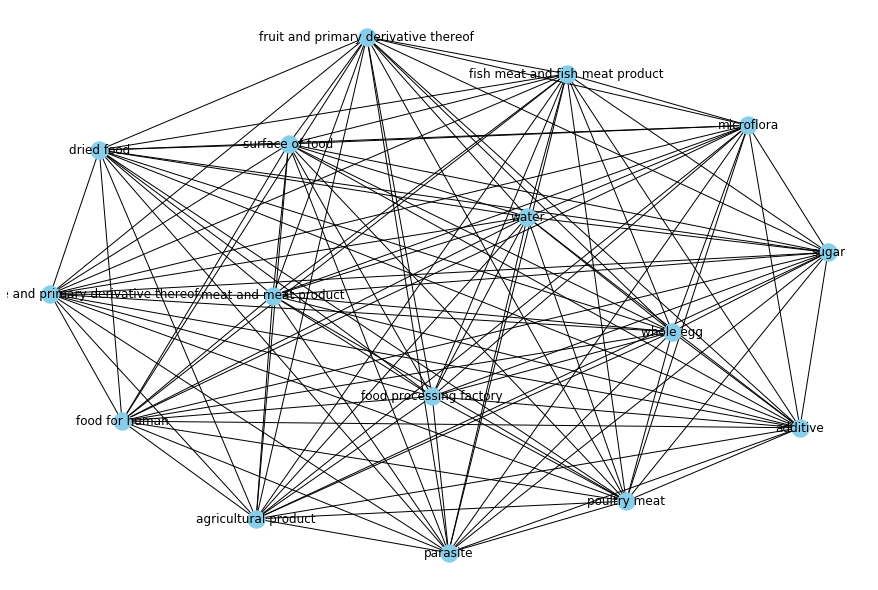

In [45]:
plt.figure(figsize=(12,8))
subgraph = enriched_graph.subgraph(max_clique)
nx.spring_layout(subgraph)
nx.draw(subgraph, with_labels=True, node_color="skyblue", labels=id_to_name)
plt.draw()
plt.savefig('./figures/max_clique_in_enriched_graph')

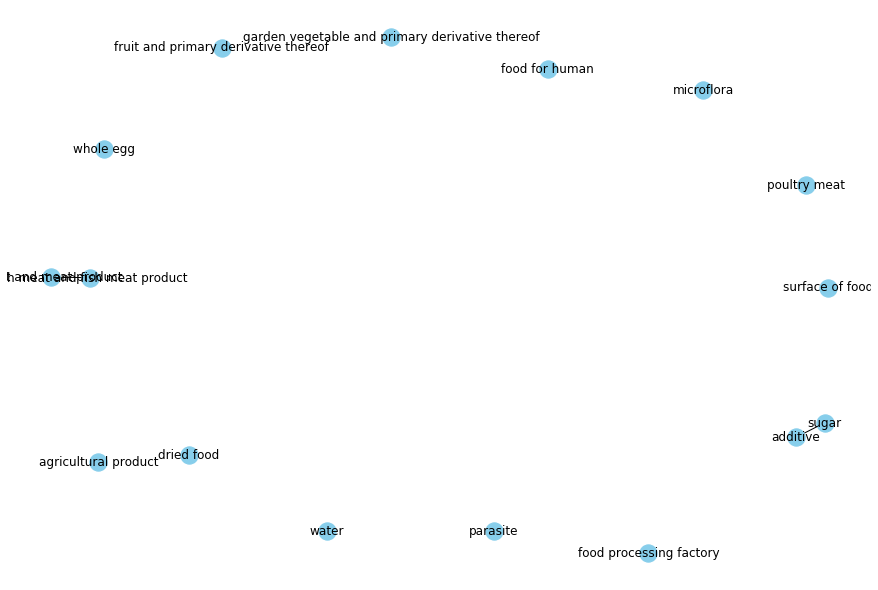

In [52]:
subgraph = graph.subgraph(max_clique)
plt.figure(figsize=(12,8))
nx.spring_layout(subgraph)
nx.draw(subgraph, with_labels=True, node_color="skyblue", labels=id_to_name)
plt.draw()
plt.savefig('./figures/max_clique_in_initial_graph')

In [48]:
cliques_initial_graph = nx.find_cliques(graph)
max_clique_initial = [c for c in cliques_initial_graph if len(c) == 3][0]
id_to_name_2 = {node_id: graph.nodes(data=True)[node_id]['name'] for node_id in max_clique_initial}

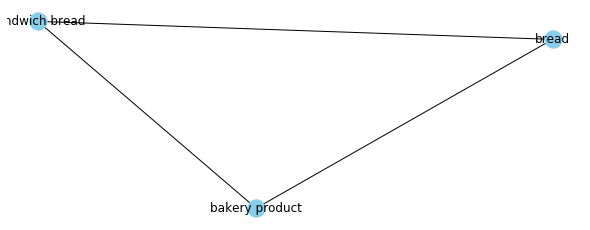

In [55]:
subgraph = graph.subgraph(max_clique_initial)
plt.figure(figsize=(8,3))
nx.spring_layout(subgraph)
nx.draw(subgraph, with_labels=True, node_color="skyblue", labels=id_to_name_2)
plt.draw()
plt.savefig('./figures/initial_max_clique')

### Node Statistics

**Degree centrality:** Assign an importance score to the nodes according to the number of incoming and outgoing relationships from that node.

In [74]:
neighbors_graph_degree = [n for n in graph.neighbors('OBT:000001')]
list_neighbors_graph_degree = [graph.nodes[n]['name'] for n in neighbors_graph_degree]
print(f'Number of neigbors of the node in the original graph with the highest degree: {len(list_neighbors_graph_degree)}')
print(list_neighbors_graph_degree, end=" ")

Number of neigbors of the node in the original graph with the highest degree: 14
['experimental medium', 'artificial environment', 'animal husbandry and agricultural habitat', 'microorganism associated habitat', 'natural environment habitat', 'animal habitat', 'root for extraction', 'living organism', 'food', 'aquaculture habitat', 'habitat wrt chemico-physical property', 'planet', 'medical environment', 'part of living organism'] 

In [75]:
neighbors_enriched_graph_degree = [n for n in enriched_graph.neighbors('OBT:000001')]
list_neighbors_enriched_graph_degree = [graph.nodes[n]['name'] for n in neighbors_enriched_graph_degree]
print(f'Number of neigbors of the node in the enriched graph with the highest degree: {len(list_neighbors_enriched_graph_degree)}')
print(list_neighbors_enriched_graph_degree, end=" ")

Number of neigbors of the node in the enriched graph with the highest degree: 14
['experimental medium', 'artificial environment', 'animal husbandry and agricultural habitat', 'microorganism associated habitat', 'natural environment habitat', 'animal habitat', 'root for extraction', 'living organism', 'food', 'aquaculture habitat', 'habitat wrt chemico-physical property', 'planet', 'medical environment', 'part of living organism'] 

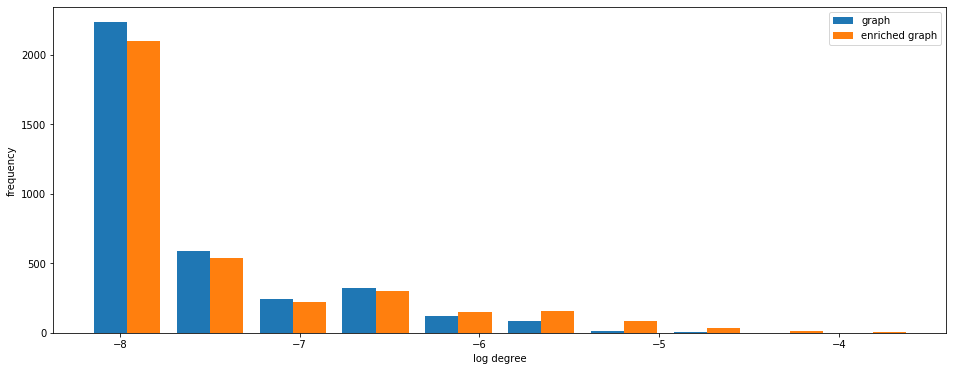

In [76]:
degree_centrality_graph = nx.degree_centrality(graph)
degree_centrality_enriched_graph = nx.degree_centrality(enriched_graph)

plt.figure(figsize=(16,6))
plt.hist([np.log(list(degree_centrality_graph.values())), np.log(list(degree_centrality_enriched_graph.values()))], label=['graph', 'enriched graph'])
plt.legend(loc='upper right')
plt.ylabel('frequency')
plt.xlabel('log degree')
plt.show()

In [77]:
df_graph_degree_centrality = pd.DataFrame(degree_centrality_graph.values(), index=degree_centrality_graph.keys()).sort_index()
df_graph_degree_centrality.columns=['degree_centrality']

df_enriched_graph_degree_centrality = pd.DataFrame(degree_centrality_enriched_graph.values(), index=degree_centrality_enriched_graph.keys()).sort_index()
df_enriched_graph_degree_centrality.columns=['degree_centrality']

In [82]:
df_diff_degree_centrality = (df_enriched_graph_degree_centrality - df_graph_degree_centrality)
a = nx.shortest_path_length(enriched_graph, source='OBT:000000')
df_diff_degree_centrality['dist_to_root'] = [a[node_id] for node_id in df_diff_degree_centrality.index]
df_diff_degree_centrality['name'] = [graph.nodes[node_id].get('name','') for node_id in df_diff_degree_centrality.index]

In [83]:
df_diff_degree_centrality.query('degree_centrality > 0').sort_values(by='degree_centrality', ascending=False).head(10)

,degree_centrality,dist_to_root,name
OBT:000648,0.027492,3,gram-negative
OBT:003220,0.026937,3,patient
OBT:003269,0.021938,3,patient with infectious disease
OBT:000113,0.020550,3,microflora
OBT:000375,0.019717,3,pathogen
OBT:000019,0.018884,2,phenotype wrt metabolic activity
OBT:000061,0.018328,3,cell
OBT:000007,0.018051,2,experimental medium
OBT:002488,0.017217,3,human
OBT:000521,0.016384,3,blood


In [84]:
print(f'Difference of two graph: {set(list_neighbors_enriched_graph_degree)-set(list_neighbors_graph_degree)}')

Difference of two graph: set()


**Eigencentrality:** Measures the importance of a node based on its neighbors.

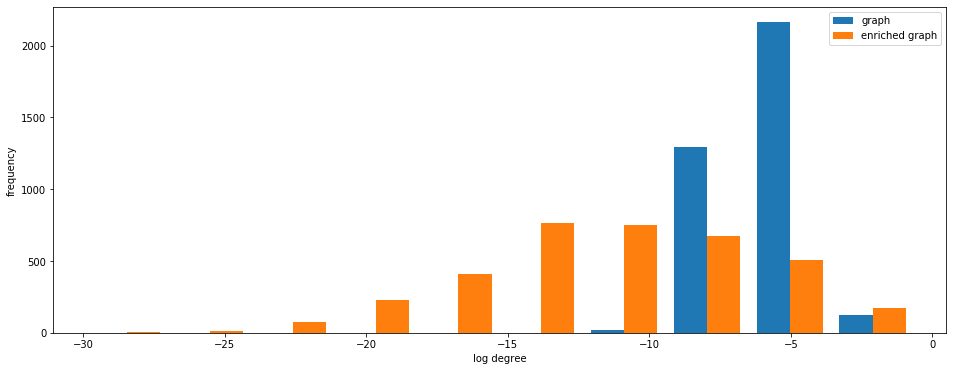

In [85]:
eigen_centrality_graph = nx.eigenvector_centrality(graph, tol=1e-03)
eigen_centrality_enriched_graph = nx.eigenvector_centrality(enriched_graph)

plt.figure(figsize=(16,6))
plt.hist([np.log(list(eigen_centrality_graph.values())), np.log(list(eigen_centrality_enriched_graph.values()))], label=['graph', 'enriched graph'])
plt.legend(loc='upper right')
plt.ylabel('frequency')
plt.xlabel('log degree')
plt.show()

In [86]:
df_graph_eigen_centrality = pd.DataFrame(eigen_centrality_graph.values(), index=eigen_centrality_graph.keys()).sort_index()
df_graph_eigen_centrality.columns=['eigen_centrality']

df_enriched_graph_eigen_centrality = pd.DataFrame(eigen_centrality_enriched_graph.values(), index=eigen_centrality_enriched_graph.keys()).sort_index()
df_enriched_graph_eigen_centrality.columns=['eigen_centrality']

In [88]:
df_diff_eigen_centrality = (df_graph_eigen_centrality - df_enriched_graph_eigen_centrality).abs()
a = nx.shortest_path_length(enriched_graph, source='OBT:000000')
df_diff_eigen_centrality['dist_to_root'] = [a[node_id] for node_id in df_diff_eigen_centrality.index]
df_diff_eigen_centrality['name'] = [graph.nodes[node_id].get('name', '') for node_id in df_diff_eigen_centrality.index]
df_diff_eigen_centrality.query('eigen_centrality > 0').sort_values(by='eigen_centrality', ascending=False).head(10)

,eigen_centrality,dist_to_root,name
OBT:000039,0.439218,3,animal part
OBT:000648,0.258666,3,gram-negative
OBT:003220,0.242323,3,patient
OBT:003269,0.205174,3,patient with infectious disease
OBT:000375,0.190177,3,pathogen
OBT:000113,0.184247,3,microflora
OBT:000019,0.170548,2,phenotype wrt metabolic activity
OBT:000332,0.155205,4,lesion
OBT:000649,0.154176,3,gram-positive
OBT:002488,0.145916,3,human


In [90]:
neighbors_graph_eigen = [n for n in graph.neighbors('OBT:001224')]
list_neighbors_graph_eigen = [graph.nodes[n].get('name','') for n in neighbors_graph_eigen]
print(f'Number of neigbors of the node in the original graph with the highest eigen degree: {len(list_neighbors_graph_eigen)}')
print(list_neighbors_graph_eigen, end=" ")

Number of neigbors of the node in the original graph with the highest eigen degree: 1
['effluent'] 

In [92]:
neighbors_enriched_graph_eigen = [n for n in enriched_graph.neighbors('OBT:001224')]
list_neighbors_enriched_graph_eigen = [graph.nodes[n].get('name','') for n in neighbors_enriched_graph_eigen]
print(f'Number of neigbors of the node in the enriched graph with the highest eigen degree: {len(list_neighbors_enriched_graph_eigen)}')
print(list_neighbors_enriched_graph_eigen, end=" ")

Number of neigbors of the node in the enriched graph with the highest eigen degree: 1
['effluent'] 

In [93]:
print(f'Difference of two graph: {set(list_neighbors_enriched_graph_eigen)-set(list_neighbors_graph_eigen)}')

Difference of two graph: set()
